In [107]:
# Import necessary modules
import pandas as pd
import requests
import numpy as np
import statsapi

### Here we send a request to MLB's API for all players in today's games:

In [106]:
url = 'http://statsapi.mlb.com/api/v1/schedule/games/?sportId=1'
r = requests.get(url=url).json()
dates = r['dates'][0]['games']
df = pd.DataFrame(dates)
df

,gamePk,gameGuid,link,gameType,season,gameDate,officialDate,status,teams,venue,...,dayNight,scheduledInnings,reverseHomeAwayStatus,inningBreakLength,gamesInSeries,seriesGameNumber,seriesDescription,recordSource,ifNecessary,ifNecessaryDescription
0,746688,85b1ad90-0073-46e6-8a5d-2948028a77a4,/api/v1.1/game/746688/feed/live,R,2024,2024-07-11T17:10:00Z,2024-07-11,"{'abstractGameState': 'Live', 'codedGameState'...","{'away': {'leagueRecord': {'wins': 33, 'losses...","{'id': 2602, 'name': 'Great American Ball Park...",...,day,9,False,120,1,1,Regular Season,S,N,Normal Game
1,746452,df593bd1-bbd7-48d1-8f0b-3973066e683c,/api/v1.1/game/746452/feed/live,R,2024,2024-07-11T17:10:00Z,2024-07-11,"{'abstractGameState': 'Live', 'codedGameState'...","{'away': {'leagueRecord': {'wins': 57, 'losses...","{'id': 2394, 'name': 'Comerica Park', 'link': ...",...,day,9,False,120,4,4,Regular Season,S,N,Normal Game
2,745799,e1a9f001-2aeb-466c-b12b-d3ca174a830c,/api/v1.1/game/745799/feed/live,R,2024,2024-07-11T17:10:00Z,2024-07-11,"{'abstractGameState': 'Live', 'codedGameState'...","{'away': {'leagueRecord': {'wins': 42, 'losses...","{'id': 3289, 'name': 'Citi Field', 'link': '/a...",...,day,9,False,120,3,3,Regular Season,S,N,Normal Game
3,745967,17609f1e-c42d-47b7-b127-e5745241a5c1,/api/v1.1/game/745967/feed/live,R,2024,2024-07-11T18:10:00Z,2024-07-11,"{'abstractGameState': 'Preview', 'codedGameSta...","{'away': {'leagueRecord': {'wins': 44, 'losses...","{'id': 32, 'name': 'American Family Field', 'l...",...,day,9,False,120,3,3,Regular Season,S,N,Normal Game
4,745313,a773f155-7608-4250-a131-2060747fb5c8,/api/v1.1/game/745313/feed/live,R,2024,2024-07-11T19:45:00Z,2024-07-11,"{'abstractGameState': 'Preview', 'codedGameSta...","{'away': {'leagueRecord': {'wins': 42, 'losses...","{'id': 2395, 'name': 'Oracle Park', 'link': '/...",...,day,9,False,120,3,3,Regular Season,S,N,Normal Game
5,745558,5a5b783c-71ad-4f42-9a74-25ddf483444d,/api/v1.1/game/745558/feed/live,R,2024,2024-07-11T22:05:00Z,2024-07-11,"{'abstractGameState': 'Preview', 'codedGameSta...","{'away': {'leagueRecord': {'wins': 55, 'losses...","{'id': 2681, 'name': 'Citizens Bank Park', 'li...",...,night,9,False,145,3,3,Regular Season,S,N,Normal Game
6,747011,5d161065-b8f6-484a-89ff-246eb020fc0a,/api/v1.1/game/747011/feed/live,R,2024,2024-07-11T22:35:00Z,2024-07-11,"{'abstractGameState': 'Preview', 'codedGameSta...","{'away': {'leagueRecord': {'wins': 44, 'losses...","{'id': 2, 'name': 'Oriole Park at Camden Yards...",...,night,9,False,120,3,3,Regular Season,S,N,Normal Game
7,745065,23f8906c-f1af-4fa3-b4d4-aca2503b9320,/api/v1.1/game/745065/feed/live,R,2024,2024-07-11T22:50:00Z,2024-07-11,"{'abstractGameState': 'Preview', 'codedGameSta...","{'away': {'leagueRecord': {'wins': 56, 'losses...","{'id': 12, 'name': 'Tropicana Field', 'link': ...",...,night,9,False,120,3,3,Regular Season,S,N,Normal Game
8,746935,275f24a1-917f-4a32-b2af-69fef87e8989,/api/v1.1/game/746935/feed/live,R,2024,2024-07-11T23:10:00Z,2024-07-11,"{'abstractGameState': 'Preview', 'codedGameSta...","{'away': {'leagueRecord': {'wins': 35, 'losses...","{'id': 3, 'name': 'Fenway Park', 'link': '/api...",...,night,9,False,120,3,3,Regular Season,S,N,Normal Game
9,746367,9cf9bd1b-951f-4148-9499-6be47cdfcd2c,/api/v1.1/game/746367/feed/live,R,2024,2024-07-12T00:10:00Z,2024-07-11,"{'abstractGameState': 'Preview', 'codedGameSta...","{'away': {'leagueRecord': {'wins': 32, 'losses...","{'id': 2392, 'name': 'Minute Maid Park', 'link...",...,night,9,False,120,3,3,Regular Season,S,N,Normal Game


In [55]:
HOST = 'https://statsapi.mlb.com'
url = HOST + df.loc[0,'link']
r = requests.get(url=url).json()
player_df = pd.DataFrame(r['gameData']['players'])
player_df_all = pd.DataFrame(['players'])
player_df = player_df.T

In [84]:
player_df.height

ID668881     6' 5"
ID682829     6' 5"
ID668845     6' 1"
ID680767     6' 0"
ID642851     6' 0"
ID682622     6' 0"
ID656222    5' 11"
ID656541     6' 4"
ID607732     6' 5"
ID607259     6' 1"
ID607536     6' 4"
ID666181     6' 5"
ID453568     6' 3"
ID458677     6' 2"
ID595909     6' 0"
ID696100    5' 11"
ID641755     6' 4"
ID663567     6' 2"
ID663886     6' 4"
ID518585     6' 2"
ID683232     6' 2"
ID685299     6' 5"
ID666157     6' 6"
ID686668     6' 4"
ID553869     6' 1"
ID594580     5' 9"
ID683627     6' 1"
ID671096     6' 0"
ID608718     6' 4"
ID677956     6' 4"
ID663372     6' 4"
ID621458     6' 3"
ID663697     6' 0"
ID686730     6' 3"
ID663898     6' 0"
ID669911     6' 5"
ID641584     6' 0"
ID641857     6' 2"
ID615698     6' 3"
ID596295     6' 5"
ID600869     6' 2"
ID621389     6' 1"
ID666134     6' 4"
ID669289    5' 10"
ID593423     6' 2"
ID668715    5' 11"
ID664875     6' 3"
ID608371     6' 2"
ID571656     6' 4"
ID678662     6' 0"
ID664747     6' 2"
ID596103     6' 1"
Name: height

In [99]:
s = player_df.loc['ID682622','height']
int(s[0]) + float(s[3]) / 12

def convert_height_to_dec(player_height):
    if len(player_height) == 6:
        player_height = int(player_height[0]) + 10/12 + float(player_height[4]) / 12
    else:
        player_height = int(player_height[0]) + float(player_height[3]) / 12
    return player_height

player_df.height = player_df.height.apply(convert_height_to_dec)

for height in player_df.height:
    print(height)

6.416666666666667
6.416666666666667
6.083333333333333
6.0
6.0
6.0
5.916666666666666
6.333333333333333
6.416666666666667
6.083333333333333
6.333333333333333
6.416666666666667
6.25
6.166666666666667
6.0
5.916666666666666
6.333333333333333
6.166666666666667
6.333333333333333
6.166666666666667
6.166666666666667
6.416666666666667
6.5
6.333333333333333
6.083333333333333
5.75
6.083333333333333
6.0
6.333333333333333
6.333333333333333
6.333333333333333
6.25
6.0
6.25
6.0
6.416666666666667
6.0
6.166666666666667
6.25
6.416666666666667
6.166666666666667
6.083333333333333
6.333333333333333
5.833333333333333
6.166666666666667
5.916666666666666
6.25
6.166666666666667
6.333333333333333
6.0
6.166666666666667
6.083333333333333


In [101]:
# player_df = player_df.T
foreign_players = player_df['birthCountry'] != 'USA'
foreigners = player_df.loc[foreign_players]
americans = player_df.loc[foreign_players == False]

<Axes: title={'center': 'MLB Players Year Drafted vs. Current Age'}, xlabel='Year Drafted', ylabel='Age'>

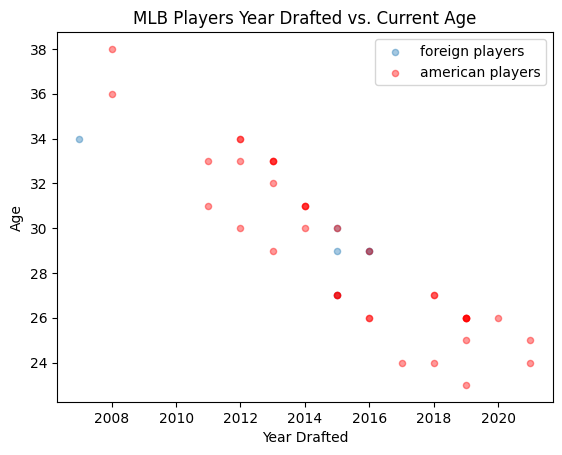

In [102]:
ax = foreigners.plot.scatter(x='draftYear', y='currentAge', alpha = 0.4, label= 'foreign players')
ax = americans.plot.scatter(x='draftYear', y='currentAge', alpha = 0.4, color= 'red', label= 'american players', ax=ax)
ax.set_ylabel('Age')
ax.set_xlabel('Year Drafted')
ax.set_title('MLB Players Year Drafted vs. Current Age')
ax

<Axes: title={'center': 'MLB Players Height vs. Weight'}, xlabel='Weight', ylabel='Height'>

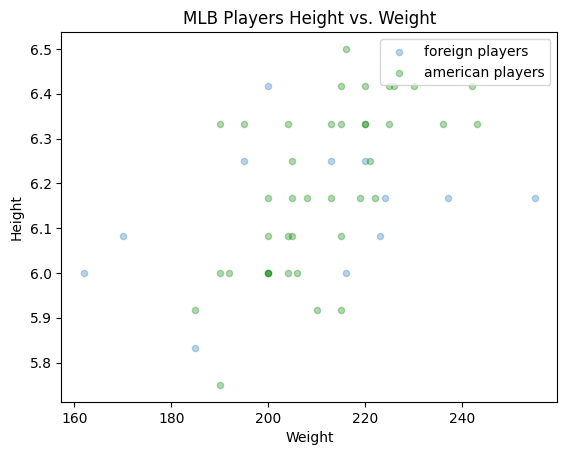

In [103]:
ax = foreigners.plot.scatter(x='weight', y='height', alpha = 0.3, label= 'foreign players')
ax = americans.plot.scatter(x='weight', y='height', alpha = 0.3, color= 'green', label= 'american players', ax=ax)
ax.set_ylabel('Height')
ax.set_xlabel('Weight')
ax.set_title('MLB Players Height vs. Weight')
ax